# Notebook to run the gaussian regularized alghorithms 

In [ ]:

from prob_models.utils.utils import read_paths, getdata

# read_add_paths('paths.txt')
# paths = read_paths('paths.txt')

import prob_models.cov_estim.estimators as es 
import prob_models.cov_estim.run_parallel as run
from prob_models.cov_estim.utils import *
import numpy as np
import os
import importlib
import matplotlib.pyplot as plt

# importlib.reload(run)


In [ ]:
nsamples = 200
nfeatures = 116

X = np.random.randn(nsamples, nfeatures)  # dummy dataset with true covariance I
Xtrain = X[:int(0.8*nsamples)]
Xtest = X[int(0.8*nsamples):]

res = es.fit_PCA(Xtrain, Xtest, ncomponents=10)
# res = es.fit_PCA_CV(Xtrain, Xtest, cv_scoring="likelihood", n_jobs=None)
# res = es.fit_PCA_Minka(Xtrain, Xtest)
# res = es.fit_ConservativePCA(Xtrain, Xtest, p=10)
# res = es.fit_ConservativePCA_CV(Xtrain, Xtest, cv_scoring="likelihood", n_jobs=None)
# res = es.fit_FactorAnalysis(Xtrain, Xtest)
# res = es.fit_FactorAnalysis_CV(Xtrain, Xtest, cv_scoring="likelihood", n_jobs=None)
# res = es.fit_GraphicalLasso(Xtrain, Xtest, alpha=0.1)
# res = es.fit_GraphicalLasso_CV(Xtrain, Xtest, n_jobs=None)
# res = es.fit_Shrinkage(Xtrain, Xtest, shrinkage=0.1)
# res = es.fit_Shrinkage_CV(Xtrain, Xtest, shrinkages=None,  cv_scoring="likelihood", n_jobs=None)
# res = es.fit_RIE(Xtrain, Xtest)
# res = es.fit_RIE_CV(Xtrain, Xtest, cv_scoring="likelihood", n_jobs=None)
# res = es.fit_GradientAscent(Xtrain, Xtest, bootstrapping=False, stop='completion', val_frac=0.1)
# res = es.fit_GradientAscentWishart(Xtrain, Xtest, bootstrapping=False, stop='completion', val_frac=0.1)

C = X.T @ X / nsamples # empirical covariance
Cclean = res["Cclean"] # cleaned covariance


In [2]:
# Load data
paths = read_paths(os.path.join(os.getcwd(), '../paths.txt'))
datadic = getdata(paths[-1])
T, N = np.shape(datadic['032302'])



In [3]:


train_fraction = 0.8
results={}

for i,( key, X) in enumerate(datadic.items()):
    if i<2:
        print (i)
        # Compute the corr mat C obtained flattening the training data from all patients
        Cbar = computeCbar([el for el in datadic.values()], train_fraction=train_fraction)
        Xtrain, Xtest = split_train_test(X, train_fraction=train_fraction, standardize=True, seed=i)
        key,value=run.single_run(i, Xtrain, Xtest, Cbar=Cbar)
        


        #adding Raw estimator
        J = np.linalg.inv(np.corrcoef(Xtrain.T))
        te_lik=impl.likelihood_set_fast(J, Xtest)    
        tr_lik=impl.likelihood_set_fast(J, Xtrain)
        value['Raw']={'test_likelihood':te_lik,
                      'train_likelihood':tr_lik}
        
        results[key]=value



0
1


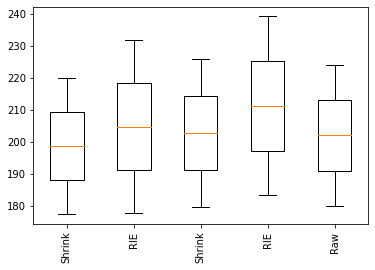

In [6]:
# file = open(filename, "rb")
# results=pickle.load(file)
# file.close()


data={}
results
for subno,sub in results.items():   
    for meth,val in sub.items():
        if meth not in data:
            data[meth]=[]
        data[meth].append(val['test_likelihood'])

#     data[key]=[results[subno]['test_likelihood'] for subno in results.keys()]
# print (data)
labels, data = data.keys(), data.values()
labels=[el.split('_')[0] for el in labels]

plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels,rotation='vertical')
plt.show()